In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## DataFrame

In [3]:
melbourne_data = pd.read_csv("/home/dockeruser/df/Melbourne_housing_extra_data-18-08-2017.csv")
filtered_melbourne_data = melbourne_data.dropna(axis=0)
melbourne_df = pd.DataFrame(filtered_melbourne_data)
#melbourne_df
#melbourne_data.columns
#melbourne_data = pd.DataFrame(melbourne_data)

In [4]:
le = preprocessing.LabelEncoder()
le.fit(list(melbourne_df["Type"]))
new_type = le.transform(list(melbourne_df["Type"]))

melbourne_df["new_type"] = new_type

In [5]:
le.fit(list(melbourne_df["Method"]))
new_method = le.transform(list(melbourne_df["Method"]))
melbourne_df["new_method"] = new_method

In [18]:
melbourne_df["age"] = 2017 - melbourne_df["YearBuilt"]

In [19]:
melbourne_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,new_type,new_method,age
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0,1,117.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0,3,117.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,0,4,3.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,0,1,107.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,0,1,127.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,75.00,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0,0,1,117.0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,190.00,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0,0,4,12.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,2,1,8.0
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,97.00,1890.0,Yarra,-37.80900,144.99760,Northern Metropolitan,4019.0,0,1,127.0
32,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,...,110.00,1880.0,Yarra,-37.80560,144.99300,Northern Metropolitan,4019.0,0,1,137.0


In [122]:
melbourne_predictors = ['Rooms','new_type', 'new_method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount']
melbourne_predictors_df = melbourne_df[melbourne_predictors]


melbourne_response_df = melbourne_df["Price"]

In [11]:
# Filter rows with missing values
#filtered_melbourne_data = melbourne_data.dropna(axis=0) #Missing value remove

#melbourne_target = filtered_melbourne_data.Price
#melbourne_predictors_data = filtered_melbourne_data[melbourne_predictors]

## Cross validation

In [123]:
melb_predictors_train, melb_predictors_val, melb_resp_train, melb_resp_val = train_test_split(melbourne_predictors_df, 
                                                                                              melbourne_response_df, test_size = 0.2,
                                                                                              random_state = 0)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [56]:
help(np.asmatrix)

Help on function asmatrix in module numpy.matrixlib.defmatrix:

asmatrix(data, dtype=None)
    Interpret the input as a matrix.
    
    Unlike `matrix`, `asmatrix` does not make a copy if the input is already
    a matrix or an ndarray.  Equivalent to ``matrix(data, copy=False)``.
    
    Parameters
    ----------
    data : array_like
        Input data.
    dtype : data-type
       Data-type of the output matrix.
    
    Returns
    -------
    mat : matrix
        `data` interpreted as a matrix.
    
    Examples
    --------
    >>> x = np.array([[1, 2], [3, 4]])
    
    >>> m = np.asmatrix(x)
    
    >>> x[0,0] = 5
    
    >>> m
    matrix([[5, 2],
            [3, 4]])



## EDA

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot
from sklearn.metrics import accuracy_score

In [10]:
mseOos = []
nTreeList = range(300, 800, 50)
for nTrees in nTreeList:
    depth = None
    maxFeat = 5
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=0)
    Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(melb_predictors_val)
    mseOos.append(mean_squared_error(melb_resp_val, prediction))

In [118]:
#help(RandomForestRegressor)

In [110]:
print("MSE")
print(mseOos[-1])

MSE
148657694675.0


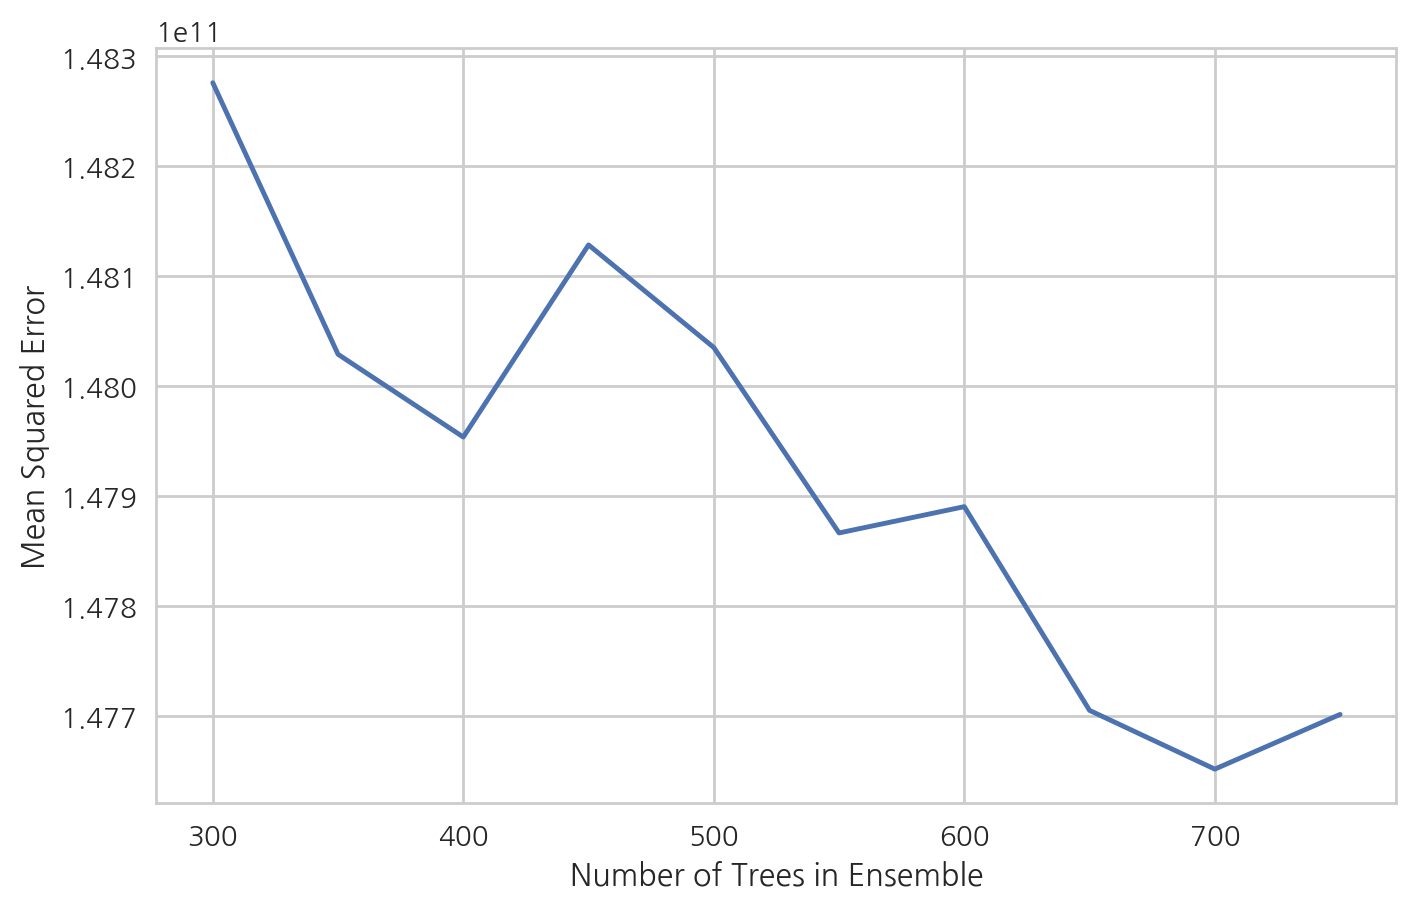

In [11]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

In [124]:
#ntree = 13
Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=700, max_features=5, random_state=0)
Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
#데이터 세트에 대한 MSE 누적
prediction = Melbourne_RFModel.predict(melb_predictors_val)

In [125]:
print(np.sqrt(mean_squared_error(melb_resp_val, prediction)))

384254.407778


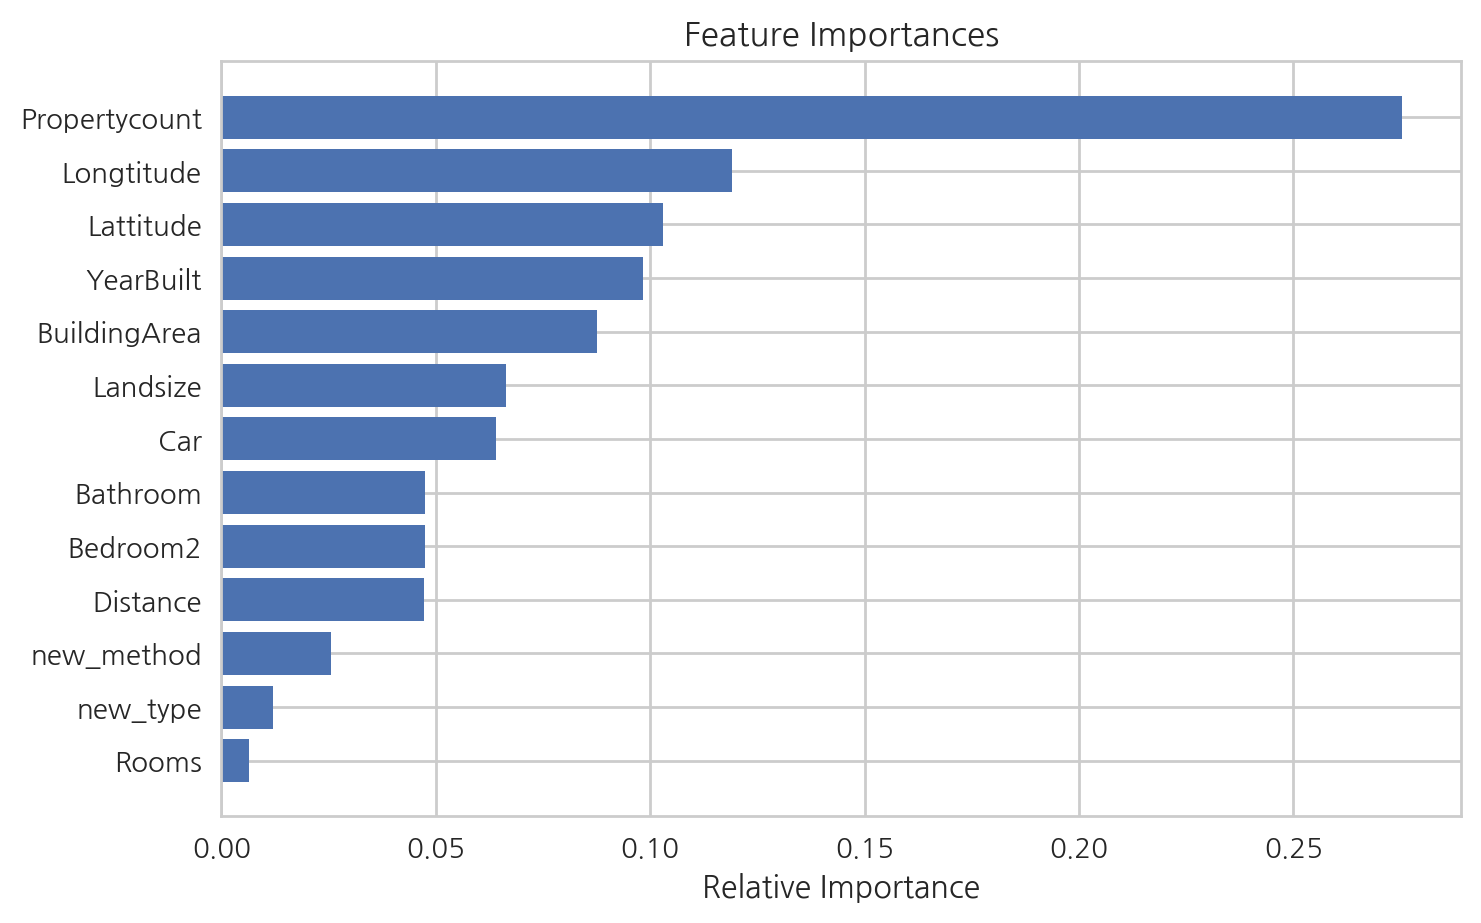

In [126]:
importances = Melbourne_RFModel.feature_importances_
indices = np.argsort(importances)[::-1]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), melbourne_predictors) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

## Random Forest 2

In [74]:
melbourne_predictors2 = ['Rooms','new_type', 'new_method', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'age', 'Longtitude', 'Propertycount']

In [75]:
melbourne_predictors_df2 = melbourne_df[melbourne_predictors2]

melb_predictors_train, melb_predictors_val, melb_resp_train, melb_resp_val = train_test_split(melbourne_predictors_df2, 
                                                                                              melbourne_response_df, test_size = 0.2,
                                                                                              random_state = 0)

In [76]:
mseOos = []
nTreeList = range(500, 1000, 50)
for nTrees in nTreeList:
    depth = None
    maxFeat = 4
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=0)
    Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(melb_predictors_val)
    mseOos.append(mean_squared_error(melb_resp_val, prediction))

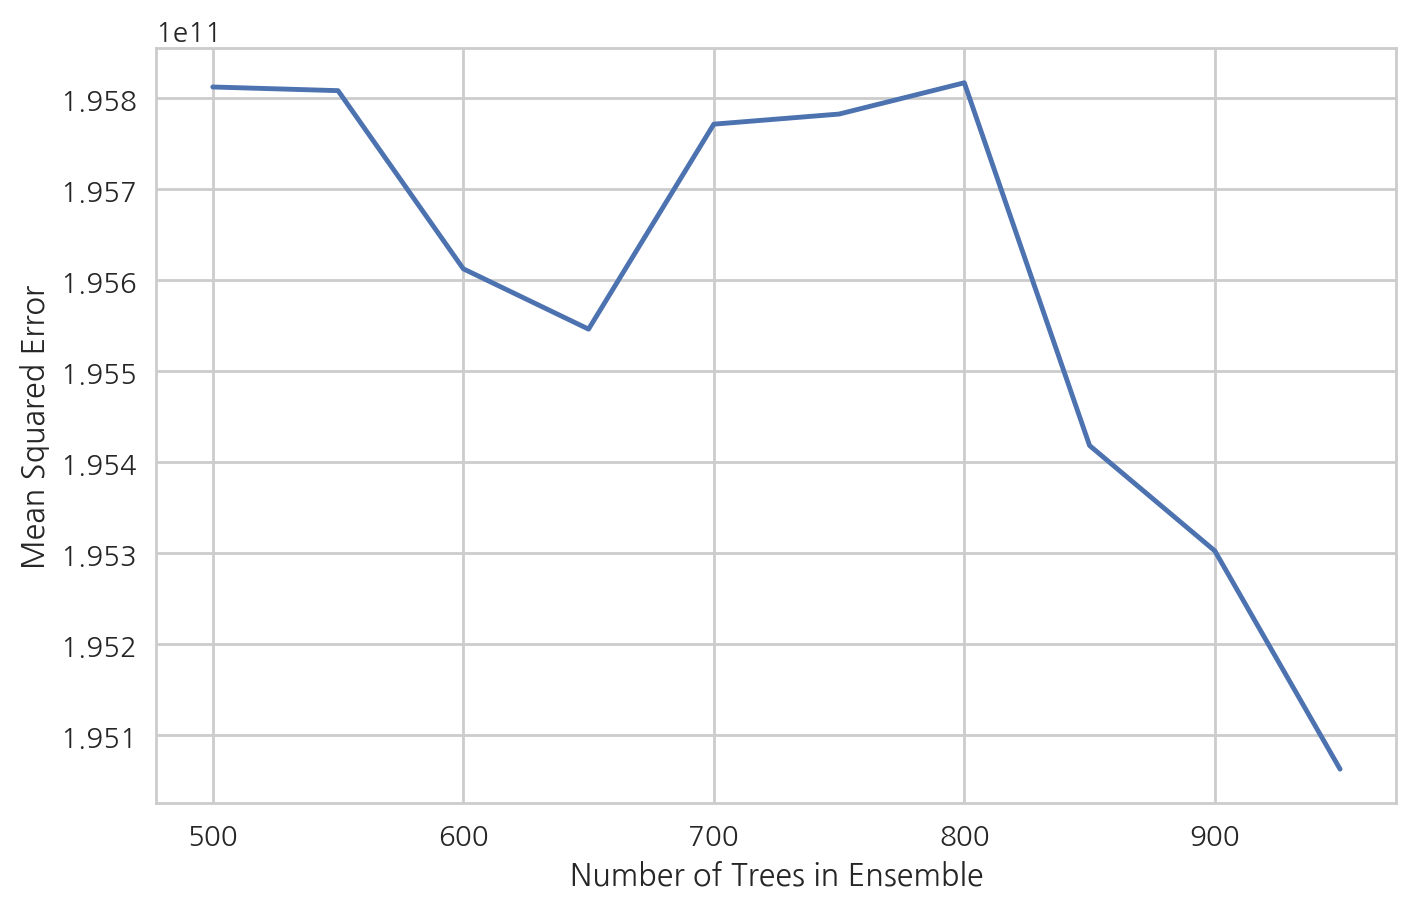

In [77]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

In [ ]:
#ntree = 13
Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=700, max_features=5, random_state=0)
Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
#데이터 세트에 대한 MSE 누적
prediction = Melbourne_RFModel.predict(melb_predictors_val)

In [ ]:
print ('RF accuracy: TESTING', Melbourne_RFModel.score(melb_predictors_val, melb_resp_val))

In [ ]:
print(np.sqrt(mean_squared_error(melb_resp_val, prediction)))

## Discrete DF Random Forest

In [84]:
subdf1 = melbourne_df[melbourne_df["new_type"]==0]
subdf2 = melbourne_df[melbourne_df["new_type"]==1]
subdf3 = melbourne_df[melbourne_df["new_type"]==2]

melbourne_predictors = ['Rooms','new_type', 'new_method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount']

sub1_predictors_df = subdf1[melbourne_predictors]
sub2_predictors_df = subdf2[melbourne_predictors]
sub3_predictors_df = subdf3[melbourne_predictors]


sub1_response_df = subdf1["Price"]
sub2_response_df = subdf2["Price"]
sub3_response_df = subdf3["Price"]


sub1_predictors_train, sub1_predictors_val, sub1_resp_train, sub1_resp_val = train_test_split(sub1_predictors_df, 
                                                                                              sub1_response_df, test_size = 0.2,
                                                                                              random_state = 0)

sub2_predictors_train, sub2_predictors_val, sub2_resp_train, sub2_resp_val = train_test_split(sub2_predictors_df, 
                                                                                              sub2_response_df, test_size = 0.2,
                                                                                              random_state = 0)

sub3_predictors_train, sub3_predictors_val, sub3_resp_train, sub3_resp_val = train_test_split(sub3_predictors_df, 
                                                                                              sub3_response_df, test_size = 0.2,
                                                                                              random_state = 0)



### sub1 RF

In [85]:
mseOos = []
nTreeList = range(300, 800, 50)
for nTrees in nTreeList:
    depth = None
    maxFeat = 5
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=0)
    Melbourne_RFModel.fit(sub1_predictors_train, sub1_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(sub1_predictors_val)
    mseOos.append(mean_squared_error(sub1_resp_val, prediction))

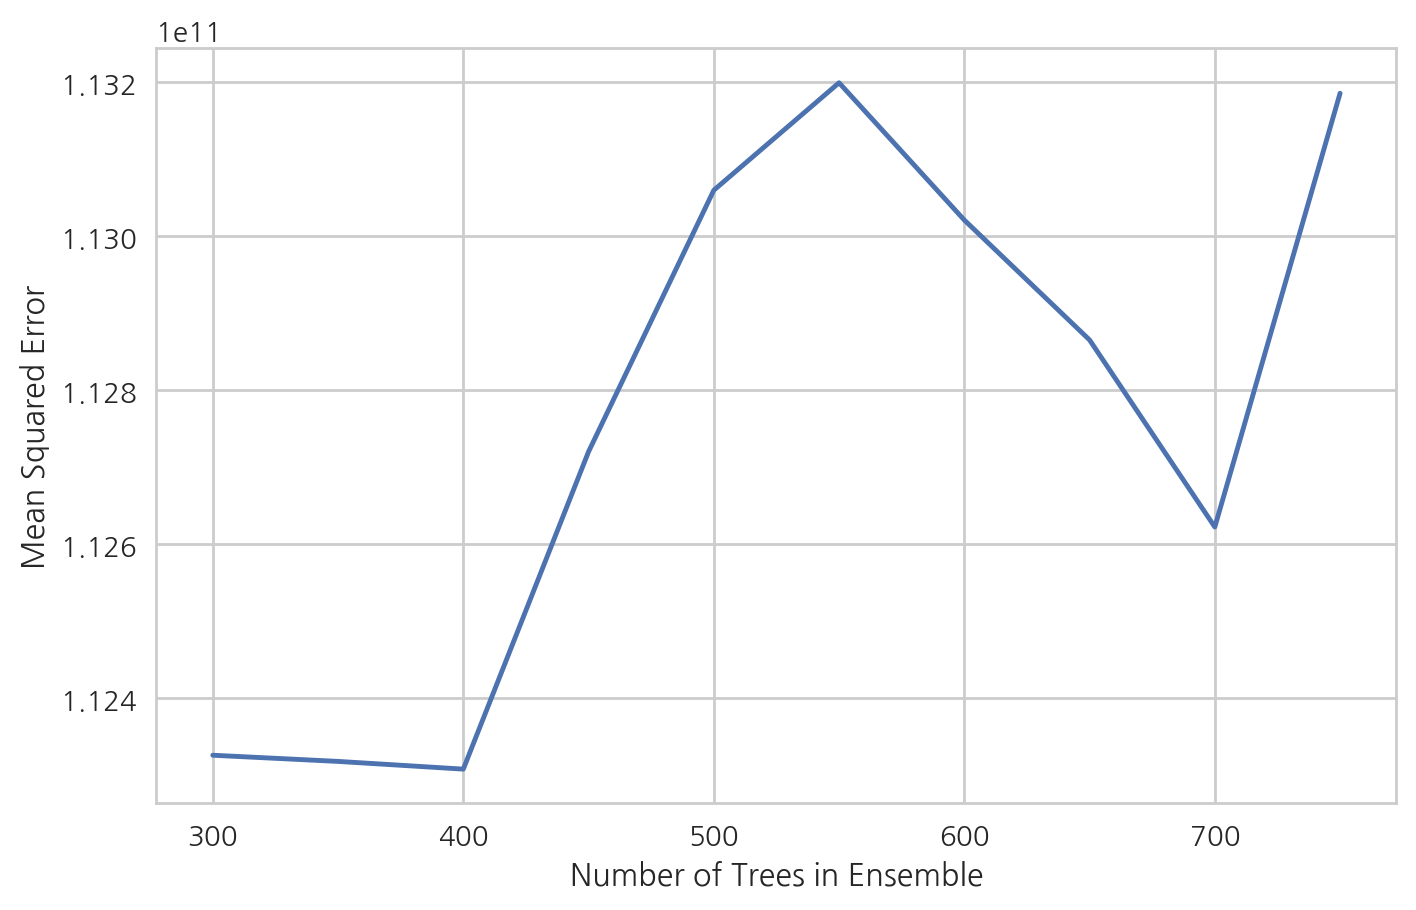

In [86]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

In [87]:
#ntree = 13
Melbourne_RFModel1 = ensemble.RandomForestRegressor(n_estimators=400, max_features=5, random_state=0)
Melbourne_RFModel1.fit(sub1_predictors_train, sub1_resp_train)
#데이터 세트에 대한 MSE 누적
prediction = Melbourne_RFModel1.predict(sub1_predictors_val)

In [90]:
print(len(prediction))
print(len(sub1_resp_val))

818
818


In [91]:
print(np.sqrt(mean_squared_error(sub1_resp_val, prediction)))

335123.844363


### sub2 RF

In [94]:
mseOos = []
nTreeList = range(100, 500, 10)
for nTrees in nTreeList:
    depth = None
    maxFeat = 5
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=0)
    Melbourne_RFModel.fit(sub2_predictors_train, sub2_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(sub2_predictors_val)
    mseOos.append(mean_squared_error(sub2_resp_val, prediction))

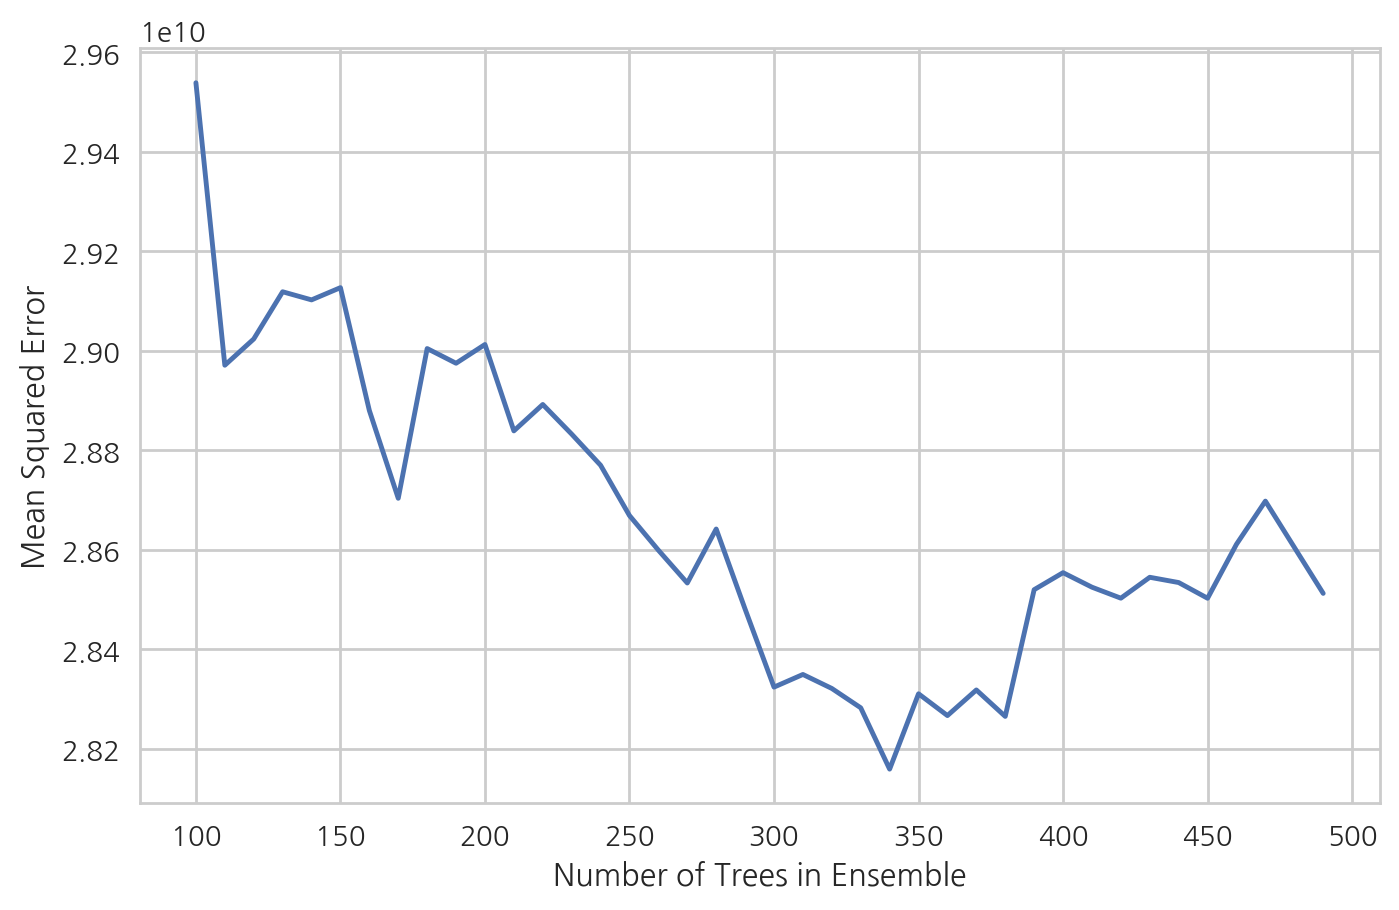

In [95]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

In [97]:
#ntree = 13
Melbourne_RFModel2 = ensemble.RandomForestRegressor(n_estimators=340, max_features=5, random_state=0)
Melbourne_RFModel2.fit(sub2_predictors_train, sub2_resp_train)
#데이터 세트에 대한 MSE 누적
prediction = Melbourne_RFModel2.predict(sub2_predictors_val)

In [99]:
print(np.sqrt(mean_squared_error(sub2_resp_val, prediction)))

167807.764864


### sub3 RF

In [100]:
mseOos = []
nTreeList = range(100, 500, 10)
for nTrees in nTreeList:
    depth = None
    maxFeat = 5
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=0)
    Melbourne_RFModel.fit(sub3_predictors_train, sub3_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(sub3_predictors_val)
    mseOos.append(mean_squared_error(sub3_resp_val, prediction))

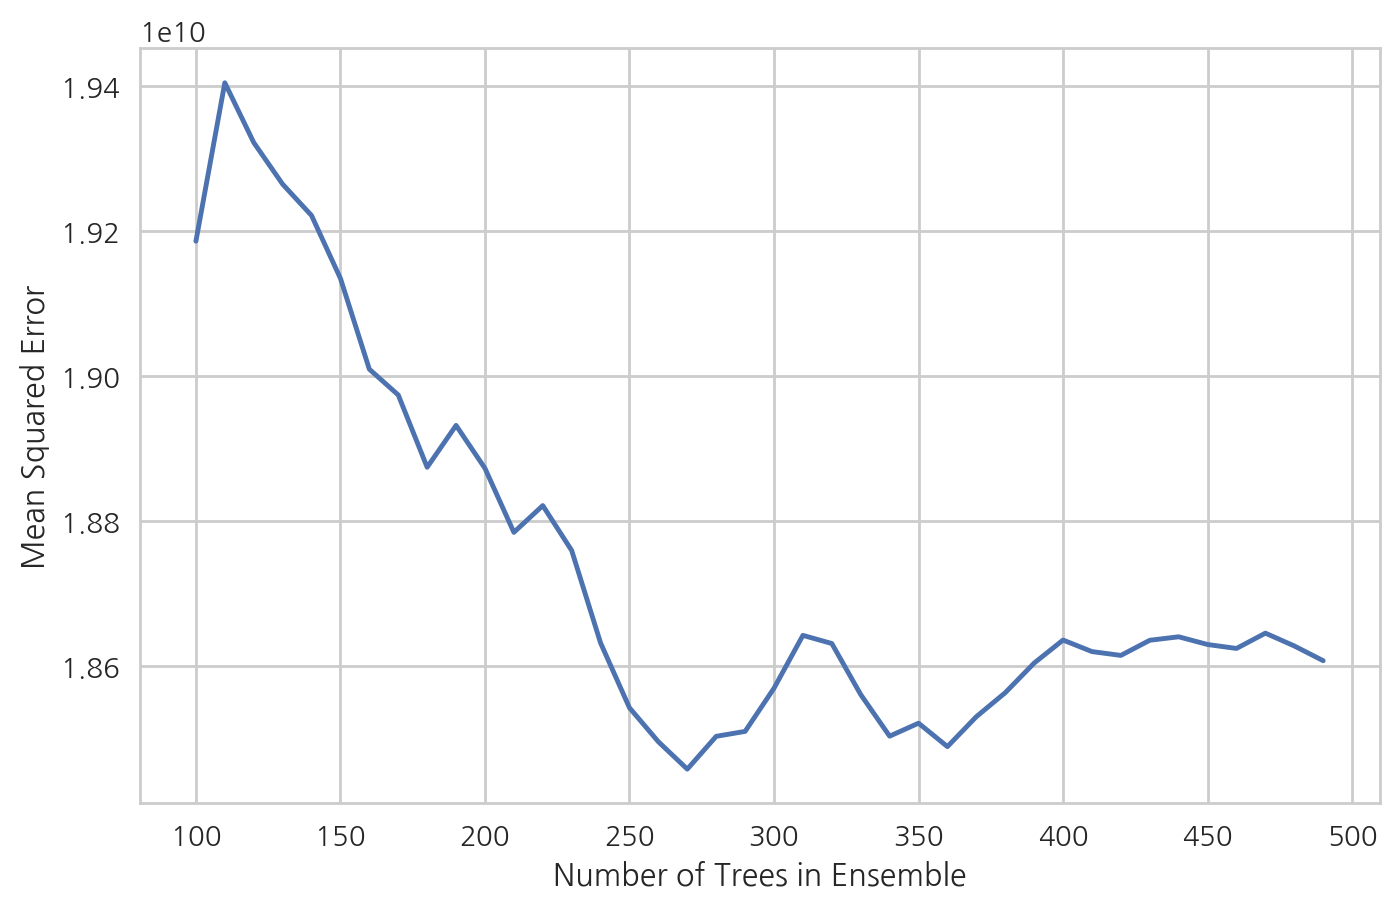

In [101]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

In [102]:
#ntree = 13
Melbourne_RFModel3 = ensemble.RandomForestRegressor(n_estimators=270, max_features=5, random_state=0)
Melbourne_RFModel3.fit(sub3_predictors_train, sub3_resp_train)
#데이터 세트에 대한 MSE 누적
prediction = Melbourne_RFModel3.predict(sub3_predictors_val)

In [103]:
print(np.sqrt(mean_squared_error(sub3_resp_val, prediction)))

135858.697968


## SVM 1 (After Scaling)

In [44]:
from sklearn.svm import SVR

In [63]:
melb_predictors_train, melb_predictors_val, melb_resp_train, melb_resp_val = train_test_split(melbourne_predictors_df2, 
                                                                                              melbourne_response_df, test_size = 0.2,
                                                                                              random_state = 0)

In [64]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = melb_predictors_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (melb_predictors_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최대값은 1입니다.
melb_predictors_train_scaled = (melb_predictors_train - min_on_training) / range_on_training
#print("특성별 최소 값\n{}".format(melb_predictors_train_scaled.min(axis=0)))
#print("특성별 최대 값\n {}".format(melb_predictors_train_scaled.max(axis=0)))

In [68]:
#Test set scaling
min_on_test = melb_predictors_val.min(axis=0)
range_on_test = (melb_predictors_val - min_on_training).max(axis=0)

melb_predictors_val_scaled = (melb_predictors_val - min_on_test) / range_on_test

In [69]:
svr = SVR()
svr.fit(melb_predictors_train_scaled, melb_resp_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
svm_prediction = svr.predict(melb_predictors_val_scaled)

In [110]:
print(np.sqrt(mean_squared_error(melb_resp_val, svm_prediction)))

771630.747923


## SVM 2(Before Scaling)

In [111]:
svr2 = SVR()
svr2.fit(melb_predictors_train, melb_resp_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
svm_prediction2 = svr2.predict(melb_predictors_val)

In [113]:
print(np.sqrt(mean_squared_error(melb_resp_val, svm_prediction2)))

771685.733068
